<a href="https://colab.research.google.com/github/Sayandeep-123/Tomato-Disease-Detector/blob/main/Tomato_disease_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam , RMSprop
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/"Tomato dataset"'
!ls {PATH_OF_DATA}

Tomato___Bacterial_spot  Tomato___healthy      Tomato___Leaf_Mold
Tomato___Early_blight	 Tomato___Late_blight


In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224,224))
image_size = 0
width=256
height=256
depth=3
directory_root= '/content/gdrive/My Drive/Tomato dataset'

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/")
        for single_plant_disease_image in plant_disease_image_list :
          if single_plant_disease_image == ".DS_Store" :
            plant_disease_image_list.remove(single_plant_disease_image)

        for image in plant_disease_image_list[:700]:
            image_directory = f"{directory_root}/{plant_folder}/{image}"
            #print(image_directory)
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/9040e017-35a4-4f74-a327-7c7d6f20ef65___GCREC_Bact.Sp 5578.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/2c2692be-ae2d-43e1-8365-8495da20fe90___GCREC_Bact.Sp 3592.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/967e3fd5-f8b1-47af-a3c4-d22f0386b013___GCREC_Bact.Sp 5606.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/92ad5b62-cec5-424b-81a6-38b6c40c0c89___GCREC_Bact.Sp 6042.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/90107060-4458-44d1-a2b3-20cd9e3d4d11___GCREC_Bact.Sp 5728.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/66b10743-4e3f-4c82-afb5-3b95d019d88d___GCREC_Bact.Sp 3392.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/dec2db16-8bae-42e0-9b02-8e3d9f0793cc___GCREC_Bact.Sp 5697.JPG
/content/gdrive/My Drive/Tomato dataset/Tomato___Bacterial_spot/8731c86e-26c5-4c48-8b07-28ab

In [ ]:
image_size = len(image_list)
image_size

3499

In [ ]:
#print("[INFO] Spliting data to train, test")
#x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 100) 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import MobileNet #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)

In [ ]:
image_labels.shape

(3499, 5)

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(image_list, image_labels, test_size=0.2, random_state = 100)

[INFO] Spliting data to train, test


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train /= 255.0
x_test /= 255.0
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

((2799, 128, 128, 1), (2799, 5))
((700, 128, 128, 1), (700, 5))


In [ ]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
test_generator.fit(x_test)

In [ ]:
#Defining the VGG Convolutional Neural Net
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (256,256,3), classes = y_train.shape[1])

In [ ]:
"""model= Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape= (128,128,1) ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))"""

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              53825000  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [1]:
"""model.add(Dense(4096,activation=('relu'),input_dim=32768))
model.add(Dense(1024,activation=('relu'))) 
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(5,activation=('softmax')))"""

"model.add(Dense(4096,activation=('relu'),input_dim=32768))\nmodel.add(Dense(1024,activation=('relu'))) \nmodel.add(Dense(512,activation=('relu')))\nmodel.add(Dense(256,activation=('relu'))) \nmodel.add(Dropout(.3))\nmodel.add(Dense(128,activation=('relu')))\nmodel.add(Dropout(.2))\nmodel.add(Dense(5,activation=('softmax')))"

In [ ]:
#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              53825000  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [ ]:
batch_size= 32
epochs=25
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#model.fit(train_generator.flow(x_train, y_train, batch_size= batch_size),epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = test_generator.flow(x_test, y_test, batch_size = batch_size), validation_steps = 250, callbacks=[lrr], verbose = 1)
history = model.fit(train_generator.flow(x_train, y_train, batch_size= batch_size),epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = test_generator.flow(x_test, y_test, batch_size = batch_size), verbose = 1)

Epoch 1/25
87/87 [==============================] - 38s 62ms/step - loss: 1.5994 - accuracy: 0.2331 - val_loss: 1.5523 - val_accuracy: 0.2757
Epoch 2/25
87/87 [==============================] - 5s 54ms/step - loss: 1.5007 - accuracy: 0.3705 - val_loss: 1.3540 - val_accuracy: 0.4243
Epoch 3/25
87/87 [==============================] - 5s 55ms/step - loss: 1.3694 - accuracy: 0.4316 - val_loss: 1.2962 - val_accuracy: 0.4714
Epoch 4/25
87/87 [==============================] - 5s 54ms/step - loss: 1.2770 - accuracy: 0.4729 - val_loss: 1.2100 - val_accuracy: 0.5186
Epoch 5/25
87/87 [==============================] - 5s 53ms/step - loss: 1.1949 - accuracy: 0.5499 - val_loss: 1.1517 - val_accuracy: 0.5414
Epoch 6/25
87/87 [==============================] - 5s 54ms/step - loss: 1.1246 - accuracy: 0.5632 - val_loss: 1.0983 - val_accuracy: 0.5971
Epoch 7/25
87/87 [==============================] - 5s 53ms/step - loss: 1.0950 - accuracy: 0.5781 - val_loss: 1.0420 - val_accuracy: 0.6057
Epoch 8/25
8

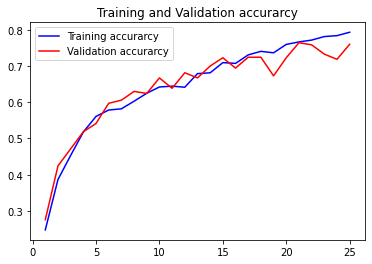

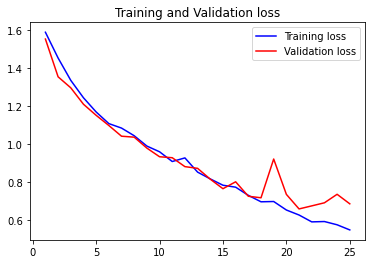

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(x_test)
print(predict[:5])
print(y_test[0:5])
len(predict) , len(y_test)

[[6.0441730e-06 5.6194082e-02 5.9678290e-02 5.2385133e-02 8.3173651e-01]
 [1.2981365e-05 9.9180728e-02 1.2512232e-01 3.9623462e-02 7.3606050e-01]
 [5.6529380e-03 2.1583654e-03 9.7156274e-01 1.6248487e-02 4.3774224e-03]
 [8.0831832e-01 1.5963210e-01 1.6348599e-02 1.5479819e-02 2.2114118e-04]
 [1.5003145e-04 3.8654721e-01 5.5304772e-01 5.2545417e-02 7.7096424e-03]]
[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]]


(700, 700)

In [ ]:
def maximum(a):
  n = len(a)
  b = []
  for i in range(n):
    maxpos = np.where(a[i] == max(a[i]))
    b.append(maxpos)
  return b

In [ ]:
y_predict = maximum(predict)
y_test_t = maximum(y_test) 
len(y_predict) , len(y_test_t)

(700, 700)

In [ ]:
print(np.array(y_predict).shape , np.array(y_test_t).shape)
pred= np.reshape(np.array(y_predict), (np.array(y_predict).shape[0],1))
test= np.reshape(np.array(y_test_t), (np.array(y_test_t).shape[0],1))
print(pred.shape , test.shape)


(700, 1, 1) (700, 1, 1)
(700, 1) (700, 1)


In [ ]:
confusion = confusion_matrix(test,pred)
print(confusion)

[[ 98  22  14  11   1]
 [  1 115  20  26   1]
 [  0  23  99  12   3]
 [  2  15   9 104   3]
 [  0   2   4   7 108]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test,pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test, pred, target_names=['Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Tomato___Early_blight',	'Tomato___Late_blight']))


Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.78
Macro Recall: 0.75
Macro F1-score: 0.76

Weighted Precision: 0.77
Weighted Recall: 0.75
Weighted F1-score: 0.75

Classification Report

                         precision    recall  f1-score   support

Tomato___Bacterial_spot       0.97      0.67      0.79       146
       Tomato___healthy       0.65      0.71      0.68       163
     Tomato___Leaf_Mold       0.68      0.72      0.70       137
  Tomato___Early_blight       0.65      0.78      0.71       133
   Tomato___Late_blight       0.93      0.89      0.91       121

               accuracy                           0.75       700
              macro avg       0.78      0.75      0.76       700
           weighted avg       0.77      0.75      0.75       700



***SAVE AND LOAD MODEL***

In [ ]:
model.save("Tomato_disease_detection.h5")

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model("/content/Tomato_disease_detection.h5")

In [ ]:
img = cv2.imread("/content/gdrive/MyDrive/Tomato dataset/Tomato___Bacterial_spot/01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG")

In [ ]:
#x = np.expand_dims(sample , axis = 0)

In [ ]:
from keras.preprocessing import image

In [ ]:
img = cv2.imread("/content/gdrive/My Drive/Tomato dataset/Tomato___Leaf_Mold/783ab4f6-4790-4381-8583-67ae6d7ac80b___Crnl_L.Mold 7088.JPG")

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, default_image_size)

In [ ]:
img.shape

(128, 128)

In [ ]:
#x = convert_image_to_array(img)
img = np.expand_dims(img , axis = -1)

In [ ]:
img = np.expand_dims(img , axis = 0);

In [ ]:
img.shape

(1, 128, 128, 1)

In [ ]:
y_sample = model.predict(img)
print(y_sample)

[[0. 0. 1. 0. 0.]]


In [ ]:
print(np.argmax(y_sample))

2


In [ ]:
img_x, img_y = 128,128
input_img=cv2.imread("/content/gdrive/My Drive/Tomato dataset/Tomato___Leaf_Mold/783ab4f6-4790-4381-8583-67ae6d7ac80b___Crnl_L.Mold 7088.JPG")
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
input_img_resize=cv2.resize(input_img,(128,128))
input_img=input_img_resize.reshape(1,img_x,img_y,1)
input_img = input_img.astype('float32')
input_img /= 255

In [ ]:
ans=model.predict(input_img)
print(ans)

[[1.3982313e-03 1.1122547e-02 5.7464853e-02 9.2999792e-01 1.6360984e-05]]


In [ ]:
print(np.argmax(ans))

3


In [ ]:
img_x, img_y = 128,128
input_img=cv2.imread("/content/gdrive/MyDrive/Tomato dataset/Tomato___Bacterial_spot/01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG")
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
input_img_resize=cv2.resize(input_img,(128,128))
input_img=input_img_resize.reshape(1,img_x,img_y,1)
input_img = input_img.astype('float32')
input_img /= 255

In [ ]:
ans=model.predict(input_img)
print(ans)

[[9.8956329e-01 9.6247848e-03 5.4560212e-04 2.6604958e-04 2.9711987e-07]]


In [ ]:
print(np.argmax(ans))

0
